In [2]:
import sys
import os

# Add the absolute path of the 'backend' folder
current_dir = os.path.dirname(os.path.abspath("__file__"))
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(parent_dir)

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import joblib
from model.MultiLinearRegression import MultiLinearRegression
import matplotlib.pyplot as plt

In [8]:
# D:\akram\docs\Master ISII\S1\Intelligence Artificielle [AI]\TP\code\propremodelIA\backend\data\DataSets 02.xlsx
df = pd.read_excel('..\data\DataSets 02.xlsx')
df

,Prix,Superficie,Secteur
0,2765952,56,campagne
1,3255785,65,campagne
2,3331295,55,campagne
3,3382160,67,campagne
4,3411387,63,campagne
...,...,...,...
6212,181503570,498,ville
6213,182202128,496,ville
6214,182230020,485,ville
6215,183393288,482,ville


In [9]:
# Clean the column names
df.columns = df.columns.str.strip()

# Extract features and target variable
X_raw = df[['Superficie', 'Secteur']]  # Features
y = df['Prix']  # Target variable

In [10]:
# Encode the categorical feature 'Secteur'
encoder = LabelEncoder()
X_raw['Secteur'] = encoder.fit_transform(X_raw['Secteur'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

C:\Users\Whitebay\AppData\Local\Temp\ipykernel_18924\1500366336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw['Secteur'] = encoder.fit_transform(X_raw['Secteur'])


In [22]:
model = MultiLinearRegression(max_steps=1000000, learning_rate=0.001)

In [23]:
model.fit(X_train, y_train)

MultiLinearRegression(learning_rate=0.001, max_steps=1000000)

In [24]:
# Evaluate on the test set
r2_test = model.score(X_test, y_test)
print("R² Score on Test Set:", r2_test)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_raw, y, cv=kf, scoring='r2')
print("Cross-Validation R² Scores:", scores)
print("Mean R² Score from Cross-Validation:", scores.mean())

R² Score on Test Set: 0.6400100442365853
Cross-Validation R² Scores: [0.64001004 0.64896846 0.63194351 0.64519704 0.61805151]
Mean R² Score from Cross-Validation: 0.636834113998586


In [27]:
# Display the model parameters
print(f"Using Gradient Descent:")
if hasattr(model, "coefficients_"):  # Check if coefficients are stored
    print(f"Slope (b1): {model.coefficients_[0]}")  # Slope for the first feature
    print(f"Intercept (b0): {model.intercept_}")    # Intercept
else:
    print("The model does not store slope and intercept explicitly.")

Using Gradient Descent:
Slope (b1): 207199.544598347
Intercept (b0): -20094317.091027804


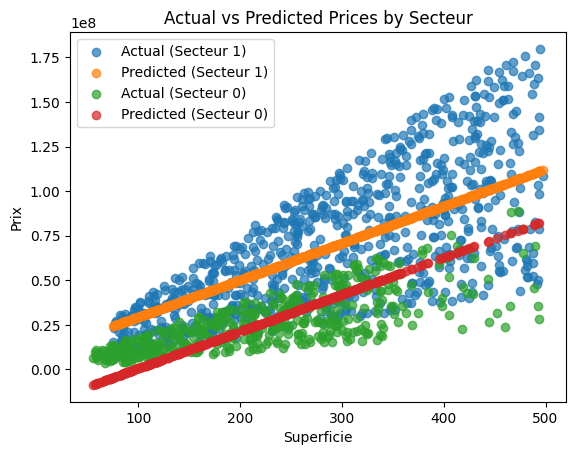

In [25]:
# Group by 'Secteur' for separate lines
for sector in X_test['Secteur'].unique():
    sector_mask = X_test['Secteur'] == sector
    plt.scatter(
        X_test.loc[sector_mask, 'Superficie'], 
        y_test[sector_mask], 
        label=f'Actual (Secteur {sector})', alpha=0.7
    )
    plt.scatter(
        X_test.loc[sector_mask, 'Superficie'], 
        model.predict(X_test[sector_mask]), 
        label=f'Predicted (Secteur {sector})', alpha=0.7
    )

plt.xlabel('Superficie')
plt.ylabel('Prix')
plt.title('Actual vs Predicted Prices by Secteur')
plt.legend()
plt.show()


In [28]:
# Sauvegarder le modèle entraîné
joblib.dump(model, 'multi_linear_regression_model.pkl')

['multi_linear_regression_model.pkl']